# Linear Regression with SciKit-Learn

**Multiple linear regression (MLR)**, also known simply as multiple regression, is a statistical technique that uses several explanatory variables to predict the outcome of a response variable. 

## This project will follow these steps:
1. Import libaries.
2. Read the data.
3. Explore the relationships between each advertising channel (TV,Radio,Newspaper) and sales.
4. Use SciKit Learn to create, fit/train the linear regression model.
5. Evaluate model performance on the test set.
6. Retrain model on full data assuming the model performance is satisfying.
7. Predict on new data.

------

# 1. Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 2. Read Data
    The data displays sales (in thousands of units) for a particular product as a function of advertising budgets (in thousands of dollars) for TV, radio, and newspaper media.

In [3]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


-------
# Multiple Features (N-Dimensional): 


## 
**What is the relationship between each advertising channel (TV,Radio,Newspaper) and sales?**


**Expected output:** Three scatter plots: TV spending versus Sales, Radio spending versus Sales and Newspaper spending versus Sales.

##

Text(0, 0.5, 'Sales')

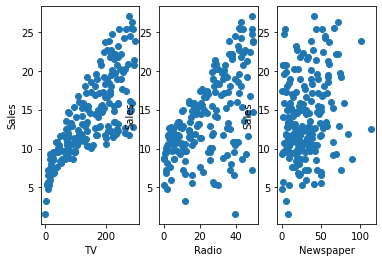

In [39]:
# code here
plt.subplot(1,3,1).scatter(x = 'TV',y='sales',data=df)
plt.xlabel("TV")
plt.ylabel("Sales")
plt.subplot(1,3,2).scatter(x='radio',y='sales',data=df)
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.subplot(1,3,3).scatter(x='newspaper',y='sales',data=df)
plt.xlabel("Newspaper")
plt.ylabel("Sales")

-------

# Use SciKit Learn to Create, Fit/Train a Linear Regression Model.

## Create Feature Matrix $\mathbf X$ and Predition Vector $\bf y$
We create a feature matrix $\mathbf X$ which contains each advertising channels for all samples, and a predition vector $\bf y$ which contains the Sales for all samples.

In [15]:
X = df.drop('sales',axis=1)
y = df['sales']

## Train | Test Split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
# random_state: 
# https://stackoverflow.com/questions/28064634/random-state-pseudo-random-number-in-scikit-learn
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=101)



## 
**Create a linear regression model and fit/train the model on the training data. Then, obtain the model coefficients and print out the coefficients.**

**Expected output**: Coefficients of the trained linear regression model.

##

In [41]:

from sklearn.linear_model import LinearRegression

var = LinearRegression()
xvar= df.drop('sales',axis=1)
yvar= df['sales']
var.fit(xvar,yvar)
print("Coefficients of the trained linear regression model: ")
print(var.coef_)



Coefficients of the trained linear regression model: 
[ 0.04576465  0.18853002 -0.00103749]


-----

# 5.  Evaluate Model Performance on Test Set


### Metrics

The three most common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

## Calculate Performance on Test Set

We want to fairly evaluate our model, so we get performance metrics on the test set (data the model has never seen before).

In [25]:
# X_test

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
# We only pass in test features
# The model predicts its own y hat
# We can then compare these results to the true y test label value
test_predictions = model.predict(X_test)

In [27]:
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

## 
**Now we have predictions of the sales on the test data. What are the MAE, MSE and RMSE?**


**Expected output**: <br>
Calculate the MAE, MSE and RMSE over the test data, then print out the result.

## Your solution:

In [29]:

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math 

mae = mean_absolute_error(y_test,test_predictions)
mse = mean_squared_error(y_test,test_predictions)
rmse = math.sqrt(mse)

print(f'The mean absolute error is {mae}')
print(f'The mean squared error is {mse}')
print(f'The root mean square error is {rmse}')

The mean absolute error is 1.213745773614481
The mean squared error is 2.2987166978863782
The root mean square error is 1.516151937599388


Are these errors small enough? We can take a comparison with the mean of the sales, which is calculated below.

In [30]:
df['sales'].mean()

14.022500000000003

-----------

# Retrain Model on Full Data

If we're satisfied with the performance on the test data, before deploying our model to the real world, we should retrain on all of our data.

In [31]:
final_model = LinearRegression()

In [32]:
final_model.fit(X,y)

LinearRegression()

Note how it may not really make sense to recalulate RMSE metrics here, since the model has already seen all the data, its not a fair judgement of performance to calculate RMSE on data its already seen, thus the purpose of the previous examination of test performance.

## Coefficients

In [33]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [34]:
coeff_df = pd.DataFrame(final_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


## (Interpreting the coefficients): 
From the coefficients, answer the following questions :
1. Which advertising channel has the largest impact on the sales? 
2. Which advertising channel has the smallest impact on the sales? 
2. For every $\$1000$ dollars spent on TV Ads, how many units of sales are expected to change? Is this change an increase or a decrease? (Note that in the dataset, the advertising budgets are displayed in thousands of dollars, and the sales are displayed in thousands of units)
3. For every $\$1000$ dollars spent on Radio Ads, how many units of sales are expected to change? Is this change an increase or a decrease? (Note that in the dataset, the advertising budgets are displayed in thousands of dollars, and the sales are displayed in thousands of units)
4. For every $\$1000$ dollars spent on Newpaper Ads, how many units of sales are expected to change? Is this change an increase or a decrease? (Note that in the dataset, the advertising budgets are displayed in thousands of dollars, and the sales are displayed in thousands of units)

----
# Prediction on New Data


##:
**Our next ad campaign will have a total spending budget of 149k on TV, 22k on Radio, and 12k on Newspaper Ads, how much sales (in thousands of units) could we expect as a result of this?**

**Expected output**: The sales prediction (in thousands of units).

## Your Solution:

In [45]:
# code here
newx = [[149,22,12]]
new_predictions = model.predict(newx)
print(f'The sales prediction (in thousands of units) is {new_predictions}')

The sales prediction (in thousands of units) is [13.93380216]
